#### Using Web Scraping and Logistic Regression to predict salary range in Data Science field in the US.

Data: 

Data comes from a job aggregator Indeed. I have scraped job postings for cities (and their closest towns) that I consider the biggest markets for Data Science in the US. I have also looked at which cities had most pages with job posts and thus decided to analyze data for 7 cities. All findings will apply to those regions only. 

For each job post I have collected this information: job location, job title, company, salary, text of the job posting.

The goal here is to explore, which factors impact the salary and build a model that predicts the range of the salary. Normally, regression could be used here, but we will make it a classification problem and use Logistic Regression. There's a fair amount of natural variance in the data, that's why we will be predicting a range (high or low), instead of amount.

In [3]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

from IPython.core.display import HTML, Image

First, I wrote a function that turns scraped data into BeautifulSoup.

In [56]:
def get_soup_from_url(url):

    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page)
    
    return soup

This function will pull all the data I need from every job posting: for my research, I am interested in job title, company, location, salary and text body of the job post.

In [57]:
def get_posting_info(url):
    soup = get_soup_from_url(url)
    res_div = soup.findAll("div", class_=["row", "results"])
    my_data = []
    for jt in res_div:
        
        try:
            job = jt.find(class_="jobtitle").text.replace('\n','')
        except:
            job= None
        
        try:
            company = jt.find(class_="company").text.strip()
        except:
            company = None
        
        try:
            location = jt.find('span', class_='location').text
        except:
            location = None

        try: 
            salary = jt.find('nobr').text
        except:
            salary = None

        try:
            text_body = jt.find('span', class_='summary').text
        except:
            text_body = None

        sr = (job, location, company, salary, text_body)

        my_data.append(sr)
    return my_data
    
    

I have 7 cities I want to work with and they each have multiple pages with job postings on indeed.com. I need a loop that would go to the page for each city and also loop through those pages and collect links so that I have enough job posts to work with. 

In [58]:
url = ['https://www.indeed.com/jobs?q=data+scientist&l=', '&start=']

cities= [
    ['New+York', 'NY'], 
    ['Austin', 'TX'], 
    ['San+Francisco', 'CA'], 
    ['Boston', 'MA'], 
    ['Seattle', 'WA'],
    ['Washington', 'DC'],
    ['Mountain+View', 'CA']
]
max_posts=1000
list_of_links = []
for i in range(len(cities)):
    for start in range(0, max_posts, 10):
        link=url[0] + cities[i][0] + '%2C' + cities[i][1] + url[1] + str(start)
        list_of_links.append(link)
  
        print '.',
    print cities[i],

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ['New+York', 'NY'] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ['Austin', 'TX'] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ['San+Francisco', 'CA'] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ['Boston', 'MA'] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [59]:
len(list_of_links)

700

I have the list of links and now I am ready to scrape again and get all information for my research.

In [60]:
table = []
for url in list_of_links:
    info = get_posting_info(url)
    table.append(info)
    print '.',

//anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file //anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [61]:
len(table)

700

In [62]:
table[0][0]

(u'Data Scientist - Big Data & Analytics',
 u'New York, NY 10154',
 u'KPMG',
 None,
 u'Analyze and model structured data and implement algorithms to support analysis using advanced statistical and mathematical methods from statistics, machine...')

In [63]:
big_df=pd.DataFrame()
for element in table:
    print '.',
    df = pd.DataFrame(element, columns=['title', 'location', 'company', 'salary', 'text'])
    big_df=pd.concat([big_df, df])
    

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [64]:
len(big_df)

10478

In [65]:
big_df.head(20)

,title,location,company,salary,text
0,Data Scientist - Big Data & Analytics,"New York, NY 10154",KPMG,None,Analyze and model structured data and implemen...
1,Deep Learning Data Scientist,"New York, NY",WorkFusion,None,Deep learning via multilayered neural networks...
2,Data Scientist,"New York, NY 10154",KPMG,None,"Machine learning, data visualization, statisti..."
3,Data Scientist,"New York, NY 10016 (Gramercy area)",Gilt Groupe,None,\nData scientists use the tools of statistics ...
4,Data Scientist,"New York, NY",Rockstar New York,None,\nExtensive knowledge of machine learning tech...
5,Data Scientist,"New York, NY",Isaacson Search Company,None,\nMust have deep knowledge of modern data para...
6,Quantitative Researcher / Data Scientist,"New York, NY",DRW,None,\nWe are looking for a Data Scientist / Quanti...
7,Data Scientist,"New York, NY 10018 (Clinton area)","AbilTo, Inc",None,"\nWith our Research team, you will build claim..."
8,Data Scientist at FXcompared,"New York, NY",Brooklyn Data Science,None,\nWe are looking for full-time Data Scientists...
9,Data Scientist - Nielsen Marketing Cloud,"New York, NY 10003 (Greenwich Village area)",Nielsen,None,\nMinimum of 3+ years relevant analytics and d...


In [4]:
# big_df.to_csv('firstscrapeXXXXX.csv', encoding='utf-8')
firstscrape = pd.read_csv("firstscrapeXXXXX.csv")

After inspecting the dataframe I see that for most posts the salary information is missing. I can only work with those entries, where there's salary info, so I am dropping everything else.

In [5]:
firstscrape = firstscrape.dropna()

In [6]:
firstscrape.head(5)

,Unnamed: 0,title,location,company,salary,text
19,4,Data Scientist,"New York, NY",Scienaptic Systems Inc,"$100,000 a year","\nAs our representative in front of client, yo..."
42,12,Senior Data Scientist/Predictive Modeller,"New York, NY",Oliver James Associates,"$160,000 - $200,000 a year",\nCreate project milestone plans to ensure pro...
97,7,Data Scientist,"New York, NY",Oliver James Associates,"$90,000 a year",\nDevelops and builds alignment within Product...
99,9,Data Scientist (Media),"New York, NY",Principle Solutions Group,"$140,000 a year",\nData Scientist (Media). Requirements for Dat...
102,12,Data Scientist,"New York, NY",TW Staffing Solutions,"$199,000 a year",\nRun scripts and other machine learning tools...


In [7]:
len(firstscrape)

306

Looks much better, but now I am down to 306 lines in my dataframe. I also need to remove all duplicates - there are a lot of job posts that posted more the once.

In [8]:
firstscrape =firstscrape.drop_duplicates()

In [9]:
len(firstscrape)

181

In [10]:
firstscrape = firstscrape.reset_index(drop=True)

In [11]:
firstscrape.drop('Unnamed: 0', inplace=True, axis=1)


In [12]:
firstscrape.head(5)

,title,location,company,salary,text
0,Data Scientist,"New York, NY",Scienaptic Systems Inc,"$100,000 a year","\nAs our representative in front of client, yo..."
1,Senior Data Scientist/Predictive Modeller,"New York, NY",Oliver James Associates,"$160,000 - $200,000 a year",\nCreate project milestone plans to ensure pro...
2,Data Scientist,"New York, NY",Oliver James Associates,"$90,000 a year",\nDevelops and builds alignment within Product...
3,Data Scientist (Media),"New York, NY",Principle Solutions Group,"$140,000 a year",\nData Scientist (Media). Requirements for Dat...
4,Data Scientist,"New York, NY",TW Staffing Solutions,"$199,000 a year",\nRun scripts and other machine learning tools...


I start cleaning my salary data - I decided not to use hourly, daily and weekely rate - I think those are the rates for temporary and contracted positions and not a true representation of a salary for a full time position in Data Science field.

In [13]:
for i in firstscrape['salary']:
    try:
        firstscrape['salary'] = firstscrape['salary'].str.lstrip('$')
    except:
        pass
    
    try:
        firstscrape['salary'] = firstscrape['salary'].astype(float)
    except:
        pass



In [14]:
firstscrape.head(5)

,title,location,company,salary,text
0,Data Scientist,"New York, NY",Scienaptic Systems Inc,"100,000 a year","\nAs our representative in front of client, yo..."
1,Senior Data Scientist/Predictive Modeller,"New York, NY",Oliver James Associates,"160,000 - $200,000 a year",\nCreate project milestone plans to ensure pro...
2,Data Scientist,"New York, NY",Oliver James Associates,"90,000 a year",\nDevelops and builds alignment within Product...
3,Data Scientist (Media),"New York, NY",Principle Solutions Group,"140,000 a year",\nData Scientist (Media). Requirements for Dat...
4,Data Scientist,"New York, NY",TW Staffing Solutions,"199,000 a year",\nRun scripts and other machine learning tools...


In [15]:
firstscrape['salary'].value_counts()

140,000 a year               15
120,000 a year                9
180,000 a year                8
5,400 - $6,500 a month        8
3,077 - $4,113 a month        7
160,000 a year                5
6,250 - $10,833 a month       5
200,000 a year                4
170,000 a year                4
75,000 - $125,000 a year      3
120,000 - $140,000 a year     3
130,000 a year                3
2,377 - $3,062 a month        3
70,286 - $88,213 a year       3
145,000 a year                2
100,000 a year                2
80 an hour                    2
150,000 a year                2
2,739 - $3,635 a month        2
60,000 - $69,999 a year       2
150,000 - $175,000 a year     2
21.80 an hour                 2
160,000 - $190,000 a year     2
3,000 a month                 2
2,166 a month                 1
49,000 - $54,000 a year       1
2,250 a month                 1
70,286 - $83,000 a year       1
7,083 - $9,166 a month        1
80,000 a year                 1
                             ..
40 an ho

In [16]:
firstscrape = firstscrape[firstscrape.salary.str.contains('hour') ==False]
firstscrape = firstscrape[firstscrape.salary.str.contains('week') ==False]
firstscrape = firstscrape[firstscrape.salary.str.contains('day') ==False]

In [17]:
firstscrape['month_year'] = [12 if 'month' in x.lower() else 1 for x in firstscrape['salary']]

In [18]:
firstscrape['salary'] = [x.replace(' a year', '') for x in firstscrape['salary']]
firstscrape['salary'] = [x.replace(' a month', '') for x in firstscrape['salary']]
firstscrape['salary'] = [x.replace('$', '') for x in firstscrape['salary']]
firstscrape['salary'] = [x.replace(',', '') for x in firstscrape['salary']]
firstscrape['salary'] = [x.split(' - ') for x in firstscrape['salary']]
firstscrape['salary'] = [int(x[0]) if len(x) == 1 else (float(x[0]) + float(x[1])) / 2 for x in firstscrape['salary']]


In [19]:
firstscrape['converted_salary'] = firstscrape['salary'] * firstscrape['month_year']

In [20]:
firstscrape.tail(5)

,title,location,company,salary,text,month_year,converted_salary
176,Lead Data Scientist,"San Jose, CA 95113 (Downtown area)",Jobspring Partners,185000.0,\nThis opportunity will be working on creating...,1,185000.0
177,Machine Learning Engineer - NLP/AI,"San Jose, CA 95113 (Downtown area)",Jobspring Partners,200000.0,"\nExpertise in machine learning, data mining, ...",1,200000.0
178,Senior Data Scientist - Security Experience is...,"Redwood City, CA",Elevate Recruiting Group,170000.0,"\nOr Masters degree in computer science, stati...",1,170000.0
179,Software Engineer - Big Data,"Redwood City, CA 94063",Jobspring Partners,170000.0,\nA fast growing company located in Redwood Ci...,1,170000.0
180,Machine Learning Engineer - Auto R&D,"San Jose, CA 95113 (Downtown area)",Jobspring Partners,185000.0,\nYou will be a contributing member of Machine...,1,185000.0


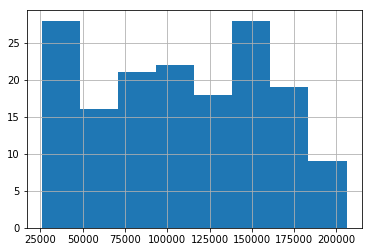

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline
firstscrape['converted_salary'].hist(bins = 8)
plt.show()

My salary data does not look normally distributed - I assume this is because I do not have many data points left after all cleaning.

Now lets look at the location - that needs a lot of cleaning as well.

In [22]:
firstscrape['location'].value_counts()

New York, NY                                         30
Austin, TX                                           24
Seattle, WA                                          21
Boston, MA                                            8
San Francisco, CA                                     7
San Francisco, CA 94105 (Financial District area)     5
San Jose, CA 95113 (Downtown area)                    4
Washington, DC                                        4
New York, NY 10018 (Clinton area)                     3
New York, NY 10167 (Midtown area)                     3
Boston, MA 02116 (South End area)                     3
Bellevue, WA                                          3
Charlestown, MA                                       3
Manhattan, NY                                         3
New York, NY 10016 (Gramercy area)                    3
Cambridge, MA                                         2
Boston, MA 02114 (Back Bay-Beacon Hill area)          2
Redmond, WA 98052                               

In [23]:
firstscrape['location'] = [x.split(', ') for x in firstscrape['location']]
firstscrape['city'] = [x[0] for x in firstscrape['location']]
firstscrape['state'] = [x[1].split(' ')[0] for x in firstscrape['location']]

In [24]:
firstscrape['state'].value_counts()

NY    44
CA    30
WA    30
TX    25
MA    23
DC     5
VA     3
MD     1
Name: state, dtype: int64

In [25]:
## Changing VA and MD to DC metro area
firstscrape['state'] = [x.replace('VA', 'DC') for x in firstscrape['state']]
firstscrape['state'] = [x.replace('MD', 'DC') for x in firstscrape['state']] 

In [26]:
firstscrape['state'].value_counts()

NY    44
CA    30
WA    30
TX    25
MA    23
DC     9
Name: state, dtype: int64

In [27]:
firstscrape.drop('location', inplace=True, axis=1)

In [28]:
firstscrape.head()

,title,company,salary,text,month_year,converted_salary,city,state
0,Data Scientist,Scienaptic Systems Inc,100000.0,"\nAs our representative in front of client, yo...",1,100000.0,New York,NY
1,Senior Data Scientist/Predictive Modeller,Oliver James Associates,180000.0,\nCreate project milestone plans to ensure pro...,1,180000.0,New York,NY
2,Data Scientist,Oliver James Associates,90000.0,\nDevelops and builds alignment within Product...,1,90000.0,New York,NY
3,Data Scientist (Media),Principle Solutions Group,140000.0,\nData Scientist (Media). Requirements for Dat...,1,140000.0,New York,NY
4,Data Scientist,TW Staffing Solutions,199000.0,\nRun scripts and other machine learning tools...,1,199000.0,New York,NY


In [29]:
firstscrape['city'].value_counts()

New York               41
Austin                 25
Seattle                24
Boston                 14
San Francisco          14
San Jose                5
Washington              5
Manhattan               3
Charlestown             3
Bellevue                3
Redmond                 3
Redwood City            2
Bedford                 2
Cambridge               2
Springfield             1
Oakland                 1
Billerica               1
Auburndale              1
San Mateo               1
Palo Alto               1
Sunnyvale               1
Burlingame              1
Campbell                1
East Bay                1
Arlington               1
Santa Clara             1
Mountain View           1
McLean                  1
Fort George G Meade     1
Name: city, dtype: int64

There are a lot of smaller towns in the list and I'm adding them to their closest large city.

In [32]:
firstscrape['city'] = [x.replace('Manhattan', 'New York') for x in firstscrape['city']]
firstscrape['city'] = [x.replace('San Francisco Bay Area', 'San Francisco') for x in firstscrape['city']] 
firstscrape['city'] = [x.replace('Cambridge', 'Boston') for x in firstscrape['city']] 
firstscrape['city'] = [x.replace('Oakland', 'San Francisco') for x in firstscrape['city']] 
firstscrape['city'] = [x.replace('Billerica', 'Boston') for x in firstscrape['city']] 
firstscrape['city'] = [x.replace('Burlingame', 'San Mateo') for x in firstscrape['city']] 
firstscrape['city'] = [x.replace('Campbell', 'Santa Clara') for x in firstscrape['city']] 
firstscrape['city'] = [x.replace('East Bay', 'San Francisco') for x in firstscrape['city']] 
firstscrape['city'] = [x.replace('McLean', 'Washington') for x in firstscrape['city']] 
firstscrape['city'] = [x.replace('Fort George G Meade', 'Washington') for x in firstscrape['city']] 
firstscrape['city'] = [x.replace('Auburndale', 'Boston') for x in firstscrape['city']] 

In [33]:
firstscrape['city'].value_counts()

New York         44
Austin           25
Seattle          24
Boston           18
San Francisco    16
Washington        7
San Jose          5
Charlestown       3
Redmond           3
Bellevue          3
Redwood City      2
Santa Clara       2
Bedford           2
San Mateo         2
Springfield       1
Sunnyvale         1
Palo Alto         1
Mountain View     1
Arlington         1
Name: city, dtype: int64

Lets look at the body of the post. There are a lot of resources on internet that talk about most valuable skills in Data Science, I want to get a list of these skills and see if my postings contain these terms.

Using this report https://adtmag.com/articles/2016/01/08/data-science-skills.aspx.
But 'statistics' isn't on their list! So I'm going to use two more reports and get a list of technical and other skills. http://dataconomy.com/2014/12/top-10-data-science-skills-and-how-to-learn-them/ and https://www.quora.com/What-are-the-most-valuable-skills-to-learn-for-a-data-scientist-now

In [34]:
features=['sql', 'hadoop', 'python', 'java', 'r', 'hive', 'nosql', \
         'sas', 'c', 'oracle', 'spss', 'matlab', 'perl', 'mysql',\
         'postgresql', 'ruby', 'html', 'stata', 'research', 'statistics', \
         'optimization', 'machine learning', 'predictive modeling',\
         'curiosity', 'domain knowledge', 'storytelling']



for i in features:
    lil_column = []
    for post in firstscrape['text']:
        if i in post.lower():
            lil_column.append(1)
        else:
            lil_column.append(0)
    firstscrape[i]=lil_column
                

                

In [35]:
firstscrape.head(5)

,title,company,salary,text,month_year,converted_salary,city,state,sql,hadoop,...,html,stata,research,statistics,optimization,machine learning,predictive modeling,curiosity,domain knowledge,storytelling
0,Data Scientist,Scienaptic Systems Inc,100000.0,"\nAs our representative in front of client, yo...",1,100000.0,New York,NY,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Senior Data Scientist/Predictive Modeller,Oliver James Associates,180000.0,\nCreate project milestone plans to ensure pro...,1,180000.0,New York,NY,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,Oliver James Associates,90000.0,\nDevelops and builds alignment within Product...,1,90000.0,New York,NY,0,0,...,0,0,0,0,0,1,1,0,0,0
3,Data Scientist (Media),Principle Solutions Group,140000.0,\nData Scientist (Media). Requirements for Dat...,1,140000.0,New York,NY,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,TW Staffing Solutions,199000.0,\nRun scripts and other machine learning tools...,1,199000.0,New York,NY,0,0,...,0,0,0,0,0,1,0,0,0,0


Lets add one more feature - I'm checking whether the word "senior" in the title plays any role.

In [36]:
def check_senior(x):
    if 'senior' in x.lower():
        return 1
    else:
        return 0

In [37]:
firstscrape['senior'] = firstscrape['title'].map(check_senior)

In [38]:
firstscrape.columns

Index([u'title', u'company', u'salary', u'text', u'month_year',
       u'converted_salary', u'city', u'state', u'sql', u'hadoop', u'python',
       u'java', u'r', u'hive', u'nosql', u'sas', u'c', u'oracle', u'spss',
       u'matlab', u'perl', u'mysql', u'postgresql', u'ruby', u'html', u'stata',
       u'research', u'statistics', u'optimization', u'machine learning',
       u'predictive modeling', u'curiosity', u'domain knowledge',
       u'storytelling', u'senior'],
      dtype='object')

Right now my salary is a numeric value - I'm going to find the mean and assign '0' to all salaries that are lower than the mean,  and '1' to salaries, that are higher than the mean.

In [39]:
mean = firstscrape['salary'].mean()
mean

93829.76086956522

In [40]:
firstscrape['target'] = [1 if x >mean else 0 for x in firstscrape['salary']]

In [41]:
firstscrape.columns

Index([u'title', u'company', u'salary', u'text', u'month_year',
       u'converted_salary', u'city', u'state', u'sql', u'hadoop', u'python',
       u'java', u'r', u'hive', u'nosql', u'sas', u'c', u'oracle', u'spss',
       u'matlab', u'perl', u'mysql', u'postgresql', u'ruby', u'html', u'stata',
       u'research', u'statistics', u'optimization', u'machine learning',
       u'predictive modeling', u'curiosity', u'domain knowledge',
       u'storytelling', u'senior', u'target'],
      dtype='object')

In [42]:
new_df = pd.DataFrame.copy(firstscrape)

Creating dummies for city and state and dropping everything else. 

In [43]:
state = pd.get_dummies(new_df['state'], drop_first=True)
new_df = pd.concat([new_df, state], axis=1)
new_df.drop('state', inplace=True, axis=1)

In [44]:
city = pd.get_dummies(new_df['city'], drop_first=True)
new_df = pd.concat([new_df, city], axis=1)
new_df.drop('city', inplace=True, axis=1)

In [45]:
new_df.drop('title', inplace=True, axis=1)
new_df.drop('company', inplace=True, axis=1)
new_df.drop('salary', inplace=True, axis=1)
new_df.drop('text', inplace=True, axis=1)
new_df.drop('month_year', inplace=True, axis=1)
new_df.drop('converted_salary', inplace=True, axis=1)

In [46]:
new_df.head()


,sql,hadoop,python,java,r,hive,nosql,sas,c,oracle,...,Redmond,Redwood City,San Francisco,San Jose,San Mateo,Santa Clara,Seattle,Springfield,Sunnyvale,Washington
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X = new_df[[i for i in list(new_df.columns) if i != 'target']]

In [48]:
y = new_df['target']

In [49]:
import patsy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)

First, I am fitting simple Logistic Regression

In [51]:
# logistic regression
lr = LogisticRegression()

In [52]:
lr_model = lr.fit(X_train, y_train)

In [53]:
lr_ypred = lr_model.predict(X_test)

In [54]:
# actual = index; predicted = columns
lr_cm = confusion_matrix(y_test, lr_ypred, labels=lr.classes_)
lr_cm = pd.DataFrame(lr_cm, columns=lr.classes_, index=lr.classes_)
lr_cm

,0,1
0,11,8
1,7,28


In [55]:
print classification_report(y_test, lr_ypred, labels=lr.classes_)

             precision    recall  f1-score   support

          0       0.61      0.58      0.59        19
          1       0.78      0.80      0.79        35

avg / total       0.72      0.72      0.72        54



#### 61% of our '0' predictions (salary is lower than the average) were correct. That's our precision score. More that half of the time we are able to correctly say that the salary will be lower than the average.

#### 78% of our '1' predictions (salary is higher than the average) were correct. Looks like we are better at predicting higher salaries.


#### Out of 19 cases when salary was lower than the average - 11 times we correctly predicted the salary would be lower than the average. In our classification report we can see that that's 58% (recall score).



#### And out of 35 cases where salary was higher than the average - we caught 28, that's  80% recall score.
    

#### Overall we correctly classified 39 cases (out of 54 cases)

#### We now know that we have quite good chances (72%) predicting whether the salary for the given position will be higher or lower than the average for Data Science field.


#### Checking CV score

In [56]:
cvs1 = cross_val_score(lr, X, y, cv=3)
cvs1

array([ 0.68518519,  0.87037037,  0.79245283])

#### This is average accuracy score for our model:

In [57]:
cvs1.mean()

0.78266946191474496

#### Lets run more models to see if we can do even better

#### We will use GridSearchCV - so that we can try several penalties and hyperparameters at the same time, without fitting our models separately. At the end we will be able to see which model and penalty perform best.


#### I'm fitting model with 15 folds and both lasso and ridge regularization and using different C values to test a grid of distinct parameters.
#### (C is inverse of regularization strength)


In [58]:
logreg = LogisticRegression(solver='liblinear')
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals},verbose=False, cv=15)

gs.fit(X, y)

GridSearchCV(cv=15, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [59]:
print gs.best_params_

{'penalty': 'l1', 'C': 2.5}


#### We are getting pretty high accuracy score:

In [60]:
print gs.best_score_

0.795031055901


#### Now lets fit that best model and look at classification recall to see how good our algorithm is at predicting.


In [61]:
logreg2 = LogisticRegression(C=gs.best_params_['C'],penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)

cv_pred = cv_model.predict(X_test)

cm = confusion_matrix(y_test, cv_pred, labels=logreg.classes_)
cm = pd.DataFrame(cm, columns=logreg.classes_, index=logreg.classes_)

cm

print classification_report(y_test, cv_pred,
                            labels=logreg.classes_)

             precision    recall  f1-score   support

          0       0.61      0.58      0.59        19
          1       0.78      0.80      0.79        35

avg / total       0.72      0.72      0.72        54



#### Our f1 scores (which is "balanced" mean score of our precision and accuracy score) are 59% and 79% for lower and higher salaries respectively.


#### Lets visualize our positive and negative rates. Area under the curve is a measure of accuracy.
#### I'm using generic curve plotting function.

In [62]:

def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (salary is higher than average)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for salaries higher than average ($ 93,829)', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()


def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive', 'True Positive', 'ROC')

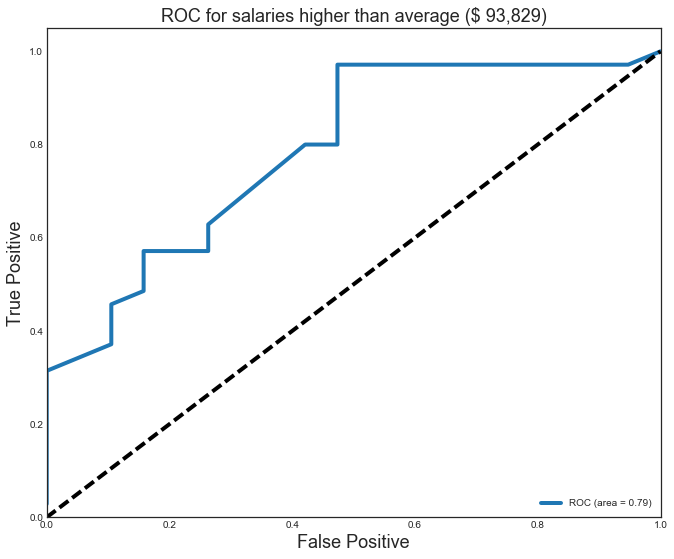

In [63]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plt.style.use('seaborn-white')
%matplotlib inline

Y_score = logreg.decision_function(X_test)
plot_roc(y_test, Y_score)

#### Finally, I want to see which features contribute most to my predictions.

In [64]:
from sklearn.feature_selection import SelectKBest, f_classif
kbest_columns = SelectKBest(f_classif, k=10)
kbest_columns.fit(X,y)
scores = -np.log10(kbest_columns.pvalues_)
scores
support = list(kbest_columns.get_support())


/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 4  5  8  9 10 12 13 14 15 16 17 23 24 25] are constant.
  UserWarning)
/Users/tetyanadzhula/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#### These are my 10 best features that have maximum relevance to my target variable.

In [65]:
X.columns[support]

Index([u'machine learning', u'senior', u'MA', u'TX', u'WA', u'Austin',
       u'Bellevue', u'Boston', u'San Jose', u'Seattle'],
      dtype='object')